In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
#Defining Function for Historical Data 
def Initialize(tickers,startyear,startmonth,startday,interval):
    yf.pdr_override()
    tickers=tickers
    startyear=startyear
    startmonth=startmonth
    startday=startday
    interval=interval
    start=dt.datetime(startyear,startmonth,startday,)
    now=dt.datetime.now()
    df=pdr.get_data_yahoo(tickers,start,now, interval=interval,)
    df.drop(['High', 'Low','Open','Close','Volume'], axis=1, inplace=True)
    df.columns = df.columns.droplevel(0)
    return df

In [3]:
#Creation of new Dataframe as per provided details
df=Initialize(tickers=['GOOGL', 'AAPL','AMZN','MSFT','GOOG','F','MS','FB','C','DIS'],
           startyear=2020,
           startmonth=7,
           startday=1,
           interval="1d")

[*********************100%***********************]  10 of 10 completed


In [4]:
#Creation of new Dataframe for returns of securities
df2=df.pct_change()
df2.dropna(inplace=True)
print(df2.head())

                AAPL      AMZN         C       DIS         F        FB  \
Date                                                                     
2020-07-01 -0.001892  0.043453 -0.014677  0.013452 -0.016447  0.046153   
2020-07-02  0.000000  0.004030  0.003972 -0.007344  0.011706 -0.017386   
2020-07-06  0.026750  0.057690  0.028091  0.020057  0.023140  0.029389   
2020-07-07 -0.003103 -0.018619 -0.031749 -0.006991 -0.011309  0.002414   
2020-07-08  0.023290  0.026996  0.011129  0.026666 -0.004902  0.011293   

                GOOG     GOOGL        MS      MSFT  
Date                                                
2020-07-01  0.017282  0.016889 -0.014286  0.005847  
2020-07-02  0.018539  0.019369  0.003781  0.007621  
2020-07-06  0.021165  0.020219  0.021553  0.021526  
2020-07-07 -0.007033 -0.006488 -0.027243 -0.011628  
2020-07-08  0.007285  0.009182  0.029901  0.021993  


In [5]:
tickers=['GOOGL', 'AAPL','AMZN','MSFT','GOOG','F','MS','FB','C','DIS']
weights = np.array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1])

In [6]:
#varcovar1 is the variance covariance matrix, it is created by correlation of the return of securities matrix
varcovar1=df2.cov()
mean_return = df2.mean()

In [7]:
#mean_return: Portfolio Mean Return
#port_sigma: Portfolio Standard Deviation
mean_return = mean_return @ weights
port_sigma = np.sqrt(weights.T @ varcovar1 @ weights)

In [8]:
#Portfolio Normal Distribution of Portfolio Mean Return against
#Portfolio Sigma 
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, mean_return, port_sigma)

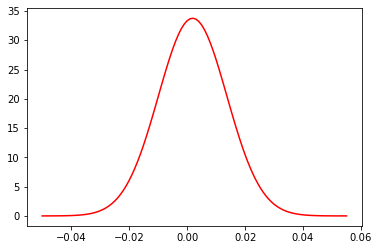

In [9]:
#Beautiful Chart of Normal Distribution
plt.plot(x, norm_dist, color = 'r')
plt.show()

In [10]:
#Calculation of VaR at Confidence Level 1%
confidence_level = 0.01

VaR = norm.ppf(confidence_level, mean_return, port_sigma)
VaR

-0.025586752673891842